<a href="https://colab.research.google.com/github/basanab/mu_e_scatt/blob/main/Identify_events.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install uproot    # new

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.9/332.9 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 631.2/631.2 kB 37.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 62.8 MB/s eta 0:00:00


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import uproot
import math as mt

In [3]:
file = uproot.open("/content/drive/MyDrive/ColabNotebooks/beryllium/scat_Be_150GeV_10Cr.root") #this data is for the simple geometry with 0.01mm thickness Be target and Glass detector of 0.00025mm.

In [4]:
file.keys()
file.classnames()
branch=file["mu_e_scatt"]
branch.keys()

['event_id',
 'mu_x',
 'mu_y',
 'mu_z',
 'e_x',
 'e_y',
 'e_z',
 'mu_E',
 'electron_E',
 'mu_px',
 'mu_py',
 'mu_pz',
 'e_px',
 'e_py',
 'e_pz',
 'scat_type']

In [5]:
Be10cr_150GeV=branch.arrays(['event_id', 'mu_x', 'mu_y', 'mu_z', 'e_x', 'e_y', 'e_z', 'mu_E','electron_E','mu_px',
 'mu_py',
 'mu_pz',
 'e_px',
 'e_py',
 'e_pz',
 'scat_type'], library="pd")

In [6]:
Be10cr_150GeV #the simulation datasheet

,event_id,mu_x,mu_y,mu_z,e_x,e_y,e_z,mu_E,electron_E,mu_px,mu_py,mu_pz,e_px,e_py,e_pz,scat_type
0,90000.0,4.172274e-07,-3.245527e-08,-3.36112,0.000000,0.000000,0.00000,149999.999347,0.000000,0.018636,-0.001450,-150105.620532,0.000000,0.000000,0.000000,2.771708e-321
1,596824.0,2.378150e-05,-2.020424e-05,-3.36112,-1.875239,1.601408,-3.36112,149998.098899,1.900161,1.062052,-0.902296,-150103.720077,-1.062426,0.881698,-1.909563,1.000000e+00
2,598816.0,-1.823107e-05,3.813226e-05,-3.36112,0.802302,-1.648485,-3.36112,149996.589134,3.410396,-0.811132,1.708046,-150102.210307,0.820411,-1.687050,-3.405438,1.000000e+00
3,928008.0,-5.574259e-07,3.678410e-07,-3.36112,-0.000365,0.000337,-3.36112,149999.346371,0.653584,0.574707,-0.538795,-150104.967555,-0.590170,0.567866,-0.651431,1.000000e+00
4,3463298.0,-6.889638e-09,-7.683987e-09,-3.36112,0.000031,0.000035,-3.36112,149966.996624,33.002676,-3.867503,-4.313411,-150072.617689,3.865722,4.329786,-33.003248,1.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5393,97024874.0,6.884484e-06,-1.230037e-05,-3.36112,-2.556715,4.581012,-3.36112,149999.611957,0.387140,0.307478,-0.549365,-150105.233141,-0.303257,0.542203,-0.399481,1.000000e+00
5394,97971645.0,2.198955e-05,-3.514246e-06,-3.36112,-3.192519,0.569154,-3.36112,149999.037663,0.961101,0.982137,-0.156960,-150104.658845,-0.928818,0.137832,-1.012056,1.000000e+00
5395,97977583.0,7.420817e-11,-6.153411e-11,-3.36112,-0.000020,0.000017,-3.36112,149999.458009,0.541575,0.577312,-0.478712,-150105.079192,-0.561340,0.486120,-0.543486,1.000000e+00
5396,98291278.0,1.626504e-05,6.166815e-06,-3.36112,-4.165810,-1.570338,-3.36112,149999.409065,0.590349,0.727548,0.267142,-150105.030248,-0.701814,-0.281165,-0.616644,1.000000e+00


In [7]:
df_sort1=Be10cr_150GeV[Be10cr_150GeV['scat_type']==1] # to sort out events containing only muon and electron
df_sort1

,event_id,mu_x,mu_y,mu_z,e_x,e_y,e_z,mu_E,electron_E,mu_px,mu_py,mu_pz,e_px,e_py,e_pz,scat_type
1,596824.0,2.378150e-05,-2.020424e-05,-3.36112,-1.875239,1.601408,-3.36112,149998.098899,1.900161,1.062052,-0.902296,-150103.720077,-1.062426,0.881698,-1.909563,1.0
2,598816.0,-1.823107e-05,3.813226e-05,-3.36112,0.802302,-1.648485,-3.36112,149996.589134,3.410396,-0.811132,1.708046,-150102.210307,0.820411,-1.687050,-3.405438,1.0
3,928008.0,-5.574259e-07,3.678410e-07,-3.36112,-0.000365,0.000337,-3.36112,149999.346371,0.653584,0.574707,-0.538795,-150104.967555,-0.590170,0.567866,-0.651431,1.0
4,3463298.0,-6.889638e-09,-7.683987e-09,-3.36112,0.000031,0.000035,-3.36112,149966.996624,33.002676,-3.867503,-4.313411,-150072.617689,3.865722,4.329786,-33.003248,1.0
5,4742052.0,-5.300941e-07,2.056159e-05,-3.36112,0.071202,-3.740130,-3.36112,149999.174290,0.825283,-0.023670,0.918140,-150104.795472,0.043777,-0.914928,-0.827961,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5393,97024874.0,6.884484e-06,-1.230037e-05,-3.36112,-2.556715,4.581012,-3.36112,149999.611957,0.387140,0.307478,-0.549365,-150105.233141,-0.303257,0.542203,-0.399481,1.0
5394,97971645.0,2.198955e-05,-3.514246e-06,-3.36112,-3.192519,0.569154,-3.36112,149999.037663,0.961101,0.982137,-0.156960,-150104.658845,-0.928818,0.137832,-1.012056,1.0
5395,97977583.0,7.420817e-11,-6.153411e-11,-3.36112,-0.000020,0.000017,-3.36112,149999.458009,0.541575,0.577312,-0.478712,-150105.079192,-0.561340,0.486120,-0.543486,1.0
5396,98291278.0,1.626504e-05,6.166815e-06,-3.36112,-4.165810,-1.570338,-3.36112,149999.409065,0.590349,0.727548,0.267142,-150105.030248,-0.701814,-0.281165,-0.616644,1.0


In [8]:
#reset index without adding new column "index" , as drop=true
df_sort1.reset_index(level=None, drop=True, inplace=True)
df_sort1

,event_id,mu_x,mu_y,mu_z,e_x,e_y,e_z,mu_E,electron_E,mu_px,mu_py,mu_pz,e_px,e_py,e_pz,scat_type
0,596824.0,2.378150e-05,-2.020424e-05,-3.36112,-1.875239,1.601408,-3.36112,149998.098899,1.900161,1.062052,-0.902296,-150103.720077,-1.062426,0.881698,-1.909563,1.0
1,598816.0,-1.823107e-05,3.813226e-05,-3.36112,0.802302,-1.648485,-3.36112,149996.589134,3.410396,-0.811132,1.708046,-150102.210307,0.820411,-1.687050,-3.405438,1.0
2,928008.0,-5.574259e-07,3.678410e-07,-3.36112,-0.000365,0.000337,-3.36112,149999.346371,0.653584,0.574707,-0.538795,-150104.967555,-0.590170,0.567866,-0.651431,1.0
3,3463298.0,-6.889638e-09,-7.683987e-09,-3.36112,0.000031,0.000035,-3.36112,149966.996624,33.002676,-3.867503,-4.313411,-150072.617689,3.865722,4.329786,-33.003248,1.0
4,4742052.0,-5.300941e-07,2.056159e-05,-3.36112,0.071202,-3.740130,-3.36112,149999.174290,0.825283,-0.023670,0.918140,-150104.795472,0.043777,-0.914928,-0.827961,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5339,97024874.0,6.884484e-06,-1.230037e-05,-3.36112,-2.556715,4.581012,-3.36112,149999.611957,0.387140,0.307478,-0.549365,-150105.233141,-0.303257,0.542203,-0.399481,1.0
5340,97971645.0,2.198955e-05,-3.514246e-06,-3.36112,-3.192519,0.569154,-3.36112,149999.037663,0.961101,0.982137,-0.156960,-150104.658845,-0.928818,0.137832,-1.012056,1.0
5341,97977583.0,7.420817e-11,-6.153411e-11,-3.36112,-0.000020,0.000017,-3.36112,149999.458009,0.541575,0.577312,-0.478712,-150105.079192,-0.561340,0.486120,-0.543486,1.0
5342,98291278.0,1.626504e-05,6.166815e-06,-3.36112,-4.165810,-1.570338,-3.36112,149999.409065,0.590349,0.727548,0.267142,-150105.030248,-0.701814,-0.281165,-0.616644,1.0


In [9]:
#This will give the number of rows in all columns where the value = 22
(df_sort1==1).sum()

event_id         0
mu_x             0
mu_y             0
mu_z             0
e_x              0
e_y              0
e_z              0
mu_E             0
electron_E       0
mu_px            0
mu_py            0
mu_pz            0
e_px             0
e_py             0
e_pz             0
scat_type     5344
dtype: int64

In [10]:
me= 0.511 * 10**(-3) #in units of GeV/c^2
mm= 207* me
Emuon =150 # in GeV
pi= np.sqrt(Emuon**2- mm**2)
pi # momentum of initial muons in units of GeV/c

149.99996270408292

In [11]:
# to find the unit momentum vectors and adding them to datasheet
muX_cap=[]
muY_cap=[]
muZ_cap=[]
eX_cap=[]
eY_cap=[]
eZ_cap=[]
for i in range(len(df_sort1)):
    den= np.sqrt(df_sort1.iloc[i]['mu_px'] **2 +df_sort1.iloc[i]['mu_py'] **2 +df_sort1.iloc[i]['mu_pz'] **2)
    den_e= np.sqrt(df_sort1.iloc[i]['e_px'] **2 +df_sort1.iloc[i]['e_py'] **2 +df_sort1.iloc[i]['e_pz'] **2)

    muX_cap.append(df_sort1.iloc[i]['mu_px']/den)
    muY_cap.append(df_sort1.iloc[i]['mu_py']/den)
    muZ_cap.append (df_sort1.iloc[i]['mu_pz']/den)
    eX_cap.append(df_sort1.iloc[i]['e_px']/den_e)
    eY_cap.append(df_sort1.iloc[i]['e_py']/den_e)
    eZ_cap.append (df_sort1.iloc[i]['e_pz']/den_e)
df_sort1["muPX_cap"]  =   muX_cap
df_sort1["muPY_cap"]  =   muY_cap
df_sort1["muPZ_cap"]  =   muZ_cap
df_sort1["ePX_cap"]  =   eX_cap
df_sort1["ePY_cap"]  =   eY_cap
df_sort1["ePZ_cap"]  =   eZ_cap



<ipython-input-11-ce486c5fa34b>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sort1["muPX_cap"]  =   muX_cap
<ipython-input-11-ce486c5fa34b>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sort1["muPY_cap"]  =   muY_cap
<ipython-input-11-ce486c5fa34b>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

In [12]:
df_sort1

,event_id,mu_x,mu_y,mu_z,e_x,e_y,e_z,mu_E,electron_E,mu_px,...,e_px,e_py,e_pz,scat_type,muPX_cap,muPY_cap,muPZ_cap,ePX_cap,ePY_cap,ePZ_cap
0,596824.0,2.378150e-05,-2.020424e-05,-3.36112,-1.875239,1.601408,-3.36112,149998.098899,1.900161,1.062052,...,-1.062426,0.881698,-1.909563,1.0,7.075454e-06,-6.011149e-06,-1.0,-0.450870,0.374173,-0.810377
1,598816.0,-1.823107e-05,3.813226e-05,-3.36112,0.802302,-1.648485,-3.36112,149996.589134,3.410396,-0.811132,...,0.820411,-1.687050,-3.405438,1.0,-5.403864e-06,1.137922e-05,-1.0,0.211013,-0.433917,-0.875894
2,928008.0,-5.574259e-07,3.678410e-07,-3.36112,-0.000365,0.000337,-3.36112,149999.346371,0.653584,0.574707,...,-0.590170,0.567866,-0.651431,1.0,3.828702e-06,-3.589455e-06,-1.0,-0.563953,0.542641,-0.622493
3,3463298.0,-6.889638e-09,-7.683987e-09,-3.36112,0.000031,0.000035,-3.36112,149966.996624,33.002676,-3.867503,...,3.865722,4.329786,-33.003248,1.0,-2.577088e-05,-2.874216e-05,-1.0,0.115361,0.129210,-0.984884
4,4742052.0,-5.300941e-07,2.056159e-05,-3.36112,0.071202,-3.740130,-3.36112,149999.174290,0.825283,-0.023670,...,0.043777,-0.914928,-0.827961,1.0,-1.576923e-07,6.116661e-06,-1.0,0.035455,-0.741001,-0.670567
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5339,97024874.0,6.884484e-06,-1.230037e-05,-3.36112,-2.556715,4.581012,-3.36112,149999.611957,0.387140,0.307478,...,-0.303257,0.542203,-0.399481,1.0,2.048417e-06,-3.659865e-06,-1.0,-0.410582,0.734093,-0.540861
5340,97971645.0,2.198955e-05,-3.514246e-06,-3.36112,-3.192519,0.569154,-3.36112,149999.037663,0.961101,0.982137,...,-0.928818,0.137832,-1.012056,1.0,6.543012e-06,-1.045667e-06,-1.0,-0.672781,0.099838,-0.733074
5341,97977583.0,7.420817e-11,-6.153411e-11,-3.36112,-0.000020,0.000017,-3.36112,149999.458009,0.541575,0.577312,...,-0.561340,0.486120,-0.543486,1.0,3.846049e-06,-3.189180e-06,-1.0,-0.610011,0.528268,-0.590609
5342,98291278.0,1.626504e-05,6.166815e-06,-3.36112,-4.165810,-1.570338,-3.36112,149999.409065,0.590349,0.727548,...,-0.701814,-0.281165,-0.616644,1.0,4.846924e-06,1.779701e-06,-1.0,-0.719347,-0.288189,-0.632050


In [13]:
# to find the coplanarity factor i.e. determinant of unit momentum vectors
deter_unit=[]
# for i in arange(5300,5344):
for i in range(len(df_sort1)):
    matx=np.array([[0,0,-1],[df_sort1["muPX_cap"][i],df_sort1["muPY_cap"][i],df_sort1["muPZ_cap"][i]],[df_sort1["ePX_cap"][i],df_sort1["ePY_cap"][i],df_sort1["ePZ_cap"][i]]])
    deter_unit.append(np.linalg.det(matx))
    # print(matx)
#momentum units are taken in MeV by Geant4
print(deter_unit)


[6.280133843090673e-08, 5.634180384816701e-08, -5.3324695503286637e-08, 1.4120796618257938e-08, 1.0001495676191541e-07, 2.3890096372183433e-08, 2.207213340934355e-07, -6.004439887264118e-08, 1.0398587047926762e-07, 7.288094937346636e-08, 7.540049624927309e-08, 1.4178690968793038e-08, 1.3821060528634088e-07, 3.4689792197266616e-08, 1.1396727861932947e-08, -3.914172325710626e-08, 3.910994257926874e-09, 2.62630073787463e-08, -1.0279730107695024e-07, -1.5090886842657695e-07, 1.0800101973059986e-07, 7.441095371667319e-08, -2.049053895301896e-07, -6.332528973546012e-08, 2.605665527269932e-08, -5.587440157099807e-08, 5.799385895655168e-08, 8.755298976222057e-08, -4.246550814998183e-08, -1.1641731715176987e-08, -5.049457884313059e-08, 1.8495792277191837e-07, -2.990793468632133e-08, 2.2930820351179186e-08, -1.770840317365272e-07, 1.093946019670472e-07, -1.0043130994217229e-07, -3.078155786399055e-08, 7.448203066185645e-08, -3.3712472674786903e-07, 1.3060867827387518e-07, 4.972755780899338e-08, 

In [14]:
# To addd the determinant values to the datasheet
df_sort1["deter_momCAP"]=deter_unit
df_sort1

<ipython-input-14-b695c40df1d7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sort1["deter_momCAP"]=deter_unit


,event_id,mu_x,mu_y,mu_z,e_x,e_y,e_z,mu_E,electron_E,mu_px,...,e_py,e_pz,scat_type,muPX_cap,muPY_cap,muPZ_cap,ePX_cap,ePY_cap,ePZ_cap,deter_momCAP
0,596824.0,2.378150e-05,-2.020424e-05,-3.36112,-1.875239,1.601408,-3.36112,149998.098899,1.900161,1.062052,...,0.881698,-1.909563,1.0,7.075454e-06,-6.011149e-06,-1.0,-0.450870,0.374173,-0.810377,6.280134e-08
1,598816.0,-1.823107e-05,3.813226e-05,-3.36112,0.802302,-1.648485,-3.36112,149996.589134,3.410396,-0.811132,...,-1.687050,-3.405438,1.0,-5.403864e-06,1.137922e-05,-1.0,0.211013,-0.433917,-0.875894,5.634180e-08
2,928008.0,-5.574259e-07,3.678410e-07,-3.36112,-0.000365,0.000337,-3.36112,149999.346371,0.653584,0.574707,...,0.567866,-0.651431,1.0,3.828702e-06,-3.589455e-06,-1.0,-0.563953,0.542641,-0.622493,-5.332470e-08
3,3463298.0,-6.889638e-09,-7.683987e-09,-3.36112,0.000031,0.000035,-3.36112,149966.996624,33.002676,-3.867503,...,4.329786,-33.003248,1.0,-2.577088e-05,-2.874216e-05,-1.0,0.115361,0.129210,-0.984884,1.412080e-08
4,4742052.0,-5.300941e-07,2.056159e-05,-3.36112,0.071202,-3.740130,-3.36112,149999.174290,0.825283,-0.023670,...,-0.914928,-0.827961,1.0,-1.576923e-07,6.116661e-06,-1.0,0.035455,-0.741001,-0.670567,1.000150e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5339,97024874.0,6.884484e-06,-1.230037e-05,-3.36112,-2.556715,4.581012,-3.36112,149999.611957,0.387140,0.307478,...,0.542203,-0.399481,1.0,2.048417e-06,-3.659865e-06,-1.0,-0.410582,0.734093,-0.540861,-1.055336e-09
5340,97971645.0,2.198955e-05,-3.514246e-06,-3.36112,-3.192519,0.569154,-3.36112,149999.037663,0.961101,0.982137,...,0.137832,-1.012056,1.0,6.543012e-06,-1.045667e-06,-1.0,-0.672781,0.099838,-0.733074,5.026563e-08
5341,97977583.0,7.420817e-11,-6.153411e-11,-3.36112,-0.000020,0.000017,-3.36112,149999.458009,0.541575,0.577312,...,0.486120,-0.543486,1.0,3.846049e-06,-3.189180e-06,-1.0,-0.610011,0.528268,-0.590609,-8.631217e-08
5342,98291278.0,1.626504e-05,6.166815e-06,-3.36112,-4.165810,-1.570338,-3.36112,149999.409065,0.590349,0.727548,...,-0.281165,-0.616644,1.0,4.846924e-06,1.779701e-06,-1.0,-0.719347,-0.288189,-0.632050,1.166063e-07


In [15]:
# To separate the events whose determinant is equal to or near to 0, Hence, getting the elastic scattering events
unit_mom_sort=df_sort1[ (abs(df_sort1['deter_momCAP'])>=0.0) & (abs(df_sort1['deter_momCAP'])<1e-05)]
unit_mom_sort

,event_id,mu_x,mu_y,mu_z,e_x,e_y,e_z,mu_E,electron_E,mu_px,...,e_py,e_pz,scat_type,muPX_cap,muPY_cap,muPZ_cap,ePX_cap,ePY_cap,ePZ_cap,deter_momCAP
0,596824.0,2.378150e-05,-2.020424e-05,-3.36112,-1.875239,1.601408,-3.36112,149998.098899,1.900161,1.062052,...,0.881698,-1.909563,1.0,7.075454e-06,-6.011149e-06,-1.0,-0.450870,0.374173,-0.810377,6.280134e-08
1,598816.0,-1.823107e-05,3.813226e-05,-3.36112,0.802302,-1.648485,-3.36112,149996.589134,3.410396,-0.811132,...,-1.687050,-3.405438,1.0,-5.403864e-06,1.137922e-05,-1.0,0.211013,-0.433917,-0.875894,5.634180e-08
2,928008.0,-5.574259e-07,3.678410e-07,-3.36112,-0.000365,0.000337,-3.36112,149999.346371,0.653584,0.574707,...,0.567866,-0.651431,1.0,3.828702e-06,-3.589455e-06,-1.0,-0.563953,0.542641,-0.622493,-5.332470e-08
3,3463298.0,-6.889638e-09,-7.683987e-09,-3.36112,0.000031,0.000035,-3.36112,149966.996624,33.002676,-3.867503,...,4.329786,-33.003248,1.0,-2.577088e-05,-2.874216e-05,-1.0,0.115361,0.129210,-0.984884,1.412080e-08
4,4742052.0,-5.300941e-07,2.056159e-05,-3.36112,0.071202,-3.740130,-3.36112,149999.174290,0.825283,-0.023670,...,-0.914928,-0.827961,1.0,-1.576923e-07,6.116661e-06,-1.0,0.035455,-0.741001,-0.670567,1.000150e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5339,97024874.0,6.884484e-06,-1.230037e-05,-3.36112,-2.556715,4.581012,-3.36112,149999.611957,0.387140,0.307478,...,0.542203,-0.399481,1.0,2.048417e-06,-3.659865e-06,-1.0,-0.410582,0.734093,-0.540861,-1.055336e-09
5340,97971645.0,2.198955e-05,-3.514246e-06,-3.36112,-3.192519,0.569154,-3.36112,149999.037663,0.961101,0.982137,...,0.137832,-1.012056,1.0,6.543012e-06,-1.045667e-06,-1.0,-0.672781,0.099838,-0.733074,5.026563e-08
5341,97977583.0,7.420817e-11,-6.153411e-11,-3.36112,-0.000020,0.000017,-3.36112,149999.458009,0.541575,0.577312,...,0.486120,-0.543486,1.0,3.846049e-06,-3.189180e-06,-1.0,-0.610011,0.528268,-0.590609,-8.631217e-08
5342,98291278.0,1.626504e-05,6.166815e-06,-3.36112,-4.165810,-1.570338,-3.36112,149999.409065,0.590349,0.727548,...,-0.281165,-0.616644,1.0,4.846924e-06,1.779701e-06,-1.0,-0.719347,-0.288189,-0.632050,1.166063e-07


(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   1., 

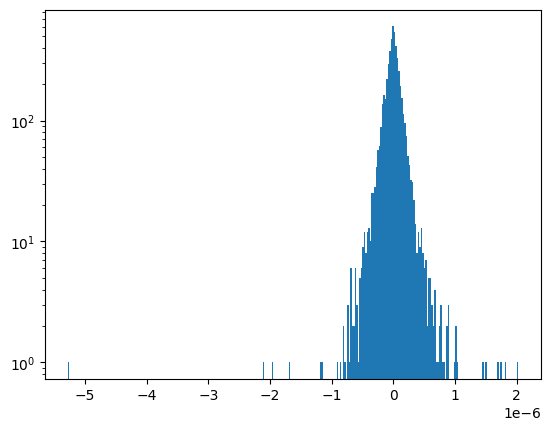

In [16]:
plt.hist(unit_mom_sort["deter_momCAP"],log =True, bins= 300)

In [17]:
# To subtract the thickness (half)of target
unit_mom_sort['mu_z'] = unit_mom_sort["mu_z"]+0.005 #units are in mm
unit_mom_sort['e_z'] = unit_mom_sort['e_z']+0.005
unit_mom_sort

<ipython-input-17-f5e36edef4c9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unit_mom_sort['mu_z'] = unit_mom_sort["mu_z"]+0.005 #units are in mm
<ipython-input-17-f5e36edef4c9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unit_mom_sort['e_z'] = unit_mom_sort['e_z']+0.005


,event_id,mu_x,mu_y,mu_z,e_x,e_y,e_z,mu_E,electron_E,mu_px,...,e_py,e_pz,scat_type,muPX_cap,muPY_cap,muPZ_cap,ePX_cap,ePY_cap,ePZ_cap,deter_momCAP
0,596824.0,2.378150e-05,-2.020424e-05,-3.35612,-1.875239,1.601408,-3.35612,149998.098899,1.900161,1.062052,...,0.881698,-1.909563,1.0,7.075454e-06,-6.011149e-06,-1.0,-0.450870,0.374173,-0.810377,6.280134e-08
1,598816.0,-1.823107e-05,3.813226e-05,-3.35612,0.802302,-1.648485,-3.35612,149996.589134,3.410396,-0.811132,...,-1.687050,-3.405438,1.0,-5.403864e-06,1.137922e-05,-1.0,0.211013,-0.433917,-0.875894,5.634180e-08
2,928008.0,-5.574259e-07,3.678410e-07,-3.35612,-0.000365,0.000337,-3.35612,149999.346371,0.653584,0.574707,...,0.567866,-0.651431,1.0,3.828702e-06,-3.589455e-06,-1.0,-0.563953,0.542641,-0.622493,-5.332470e-08
3,3463298.0,-6.889638e-09,-7.683987e-09,-3.35612,0.000031,0.000035,-3.35612,149966.996624,33.002676,-3.867503,...,4.329786,-33.003248,1.0,-2.577088e-05,-2.874216e-05,-1.0,0.115361,0.129210,-0.984884,1.412080e-08
4,4742052.0,-5.300941e-07,2.056159e-05,-3.35612,0.071202,-3.740130,-3.35612,149999.174290,0.825283,-0.023670,...,-0.914928,-0.827961,1.0,-1.576923e-07,6.116661e-06,-1.0,0.035455,-0.741001,-0.670567,1.000150e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5339,97024874.0,6.884484e-06,-1.230037e-05,-3.35612,-2.556715,4.581012,-3.35612,149999.611957,0.387140,0.307478,...,0.542203,-0.399481,1.0,2.048417e-06,-3.659865e-06,-1.0,-0.410582,0.734093,-0.540861,-1.055336e-09
5340,97971645.0,2.198955e-05,-3.514246e-06,-3.35612,-3.192519,0.569154,-3.35612,149999.037663,0.961101,0.982137,...,0.137832,-1.012056,1.0,6.543012e-06,-1.045667e-06,-1.0,-0.672781,0.099838,-0.733074,5.026563e-08
5341,97977583.0,7.420817e-11,-6.153411e-11,-3.35612,-0.000020,0.000017,-3.35612,149999.458009,0.541575,0.577312,...,0.486120,-0.543486,1.0,3.846049e-06,-3.189180e-06,-1.0,-0.610011,0.528268,-0.590609,-8.631217e-08
5342,98291278.0,1.626504e-05,6.166815e-06,-3.35612,-4.165810,-1.570338,-3.35612,149999.409065,0.590349,0.727548,...,-0.281165,-0.616644,1.0,4.846924e-06,1.779701e-06,-1.0,-0.719347,-0.288189,-0.632050,1.166063e-07


In [18]:
#To find the scattering angles of the coplanar events
BeCAP_tmu150GeV =np.pi-np.arccos( unit_mom_sort.iloc[:,3]/np.sqrt( unit_mom_sort.iloc[:,1]**2+  unit_mom_sort.iloc[:,2]**2+  unit_mom_sort.iloc[:,3]**2))
BeCAP_te150GeV = np.pi -np.arccos( unit_mom_sort.iloc[:,6]/np.sqrt( unit_mom_sort.iloc[:,4]**2+  unit_mom_sort.iloc[:,5]**2+  unit_mom_sort.iloc[:,6]**2))
unit_mom_sort["tm"]= BeCAP_tmu150GeV
unit_mom_sort["te"]=BeCAP_te150GeV
unit_mom_sort

<ipython-input-18-c3e332426667>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unit_mom_sort["tm"]= BeCAP_tmu150GeV
<ipython-input-18-c3e332426667>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unit_mom_sort["te"]=BeCAP_te150GeV


,event_id,mu_x,mu_y,mu_z,e_x,e_y,e_z,mu_E,electron_E,mu_px,...,scat_type,muPX_cap,muPY_cap,muPZ_cap,ePX_cap,ePY_cap,ePZ_cap,deter_momCAP,tm,te
0,596824.0,2.378150e-05,-2.020424e-05,-3.35612,-1.875239,1.601408,-3.35612,149998.098899,1.900161,1.062052,...,1.0,7.075454e-06,-6.011149e-06,-1.0,-0.450870,0.374173,-0.810377,6.280134e-08,9.298026e-06,0.633682
1,598816.0,-1.823107e-05,3.813226e-05,-3.35612,0.802302,-1.648485,-3.35612,149996.589134,3.410396,-0.811132,...,1.0,-5.403864e-06,1.137922e-05,-1.0,0.211013,-0.433917,-0.875894,5.634180e-08,1.259380e-05,0.499977
2,928008.0,-5.574259e-07,3.678410e-07,-3.35612,-0.000365,0.000337,-3.35612,149999.346371,0.653584,0.574707,...,1.0,3.828702e-06,-3.589455e-06,-1.0,-0.563953,0.542641,-0.622493,-5.332470e-08,1.988063e-07,0.000148
3,3463298.0,-6.889638e-09,-7.683987e-09,-3.35612,0.000031,0.000035,-3.35612,149966.996624,33.002676,-3.867503,...,1.0,-2.577088e-05,-2.874216e-05,-1.0,0.115361,0.129210,-0.984884,1.412080e-08,0.000000e+00,0.000014
4,4742052.0,-5.300941e-07,2.056159e-05,-3.35612,0.071202,-3.740130,-3.35612,149999.174290,0.825283,-0.023670,...,1.0,-1.576923e-07,6.116661e-06,-1.0,0.035455,-0.741001,-0.670567,1.000150e-07,6.128636e-06,0.839550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5339,97024874.0,6.884484e-06,-1.230037e-05,-3.35612,-2.556715,4.581012,-3.35612,149999.611957,0.387140,0.307478,...,1.0,2.048417e-06,-3.659865e-06,-1.0,-0.410582,0.734093,-0.540861,-1.055336e-09,4.200040e-06,1.001678
5340,97971645.0,2.198955e-05,-3.514246e-06,-3.35612,-3.192519,0.569154,-3.35612,149999.037663,0.961101,0.982137,...,1.0,6.543012e-06,-1.045667e-06,-1.0,-0.672781,0.099838,-0.733074,5.026563e-08,6.635201e-06,0.768236
5341,97977583.0,7.420817e-11,-6.153411e-11,-3.35612,-0.000020,0.000017,-3.35612,149999.458009,0.541575,0.577312,...,1.0,3.846049e-06,-3.189180e-06,-1.0,-0.610011,0.528268,-0.590609,-8.631217e-08,0.000000e+00,0.000008
5342,98291278.0,1.626504e-05,6.166815e-06,-3.35612,-4.165810,-1.570338,-3.35612,149999.409065,0.590349,0.727548,...,1.0,4.846924e-06,1.779701e-06,-1.0,-0.719347,-0.288189,-0.632050,1.166063e-07,5.183034e-06,0.924834


In [21]:
import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)

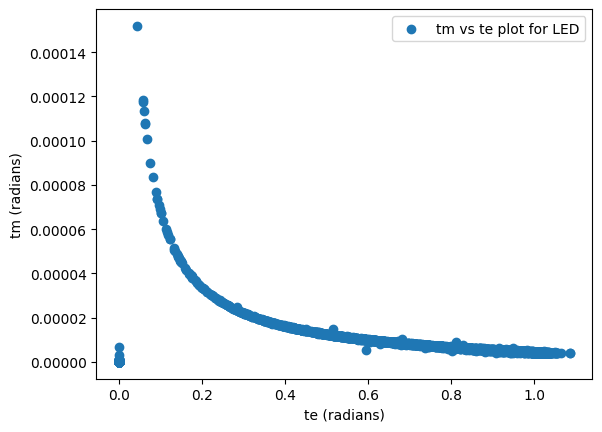

In [23]:
# to plot the theta_mu vs theta_e graph  for Linear Energy Distribution
plt.scatter(unit_mom_sort['te'],unit_mom_sort['tm'], label='tm vs te plot for LED')
plt.xlabel("te (radians)")
plt.ylabel("tm (radians)")
plt.legend(loc= 'best')

In [24]:
# To save the elastic scattering angles for different events as separate datasheet
angle_sheet_150GeV10cr_Be= unit_mom_sort[['te','tm']]
angle_sheet_150GeV10cr_Be

,te,tm
0,0.633682,9.298026e-06
1,0.499977,1.259380e-05
2,0.000148,1.988063e-07
3,0.000014,0.000000e+00
4,0.839550,6.128636e-06
...,...,...
5339,1.001678,4.200040e-06
5340,0.768236,6.635201e-06
5341,0.000008,0.000000e+00
5342,0.924834,5.183034e-06


In [25]:
# To save the angle sheet as .csv file
angle_sheet_150GeV10cr_Be.to_csv('angle_sheet_150GeV10cr_Be.csv', header= True, index= False, sep= '\t', mode='a')